In [69]:
! pip install pandas numpy seaborn matplotlib scikit-learn imblearn xgboost plotly.express nbformat plotly shap 

                                              0.0/462.3 kB ? eta -:--:--
     --------------------------------      409.6/462.3 kB 12.9 MB/s eta 0:00:01
     -------------------------------------- 462.3/462.3 kB 9.6 MB/s eta 0:00:00
                                              0.0/78.3 kB ? eta -:--:--
     ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
                                              0.0/2.6 MB ? eta -:--:--
     ----------                               0.7/2.6 MB 21.1 MB/s eta 0:00:01
     -----------------------                  1.6/2.6 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 20.6 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 16.5 MB/s eta 0:00:00
                                              0.0/28.1 MB ? eta -:--:--
                                              0.6/28.1 MB 20.5 MB/s eta 0:00:02
     --                                       1.5/28.1 MB 15.5 MB/s eta 0:00


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# **Importação das Bibliotecas necessárias** 
Nesse trecho estão sendo importadas todas as bibliotecas relevantes para a execução do projeto.

In [70]:
# importação de todas as bibliotecas que estão sendo usadas no projeto
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.colors as pc
import seaborn as sns
import shap
from joblib import dump

from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# **Leitura do Banco de Dados**

No trecho de código a seguir, está ocorrendo a importação de todas as bases de dados que serão utilizadas no projeto.

In [71]:
# Está havendo a leitura de todas as bases de dados que foram utilizadas no projeto.
dados2020_2021 = pd.read_csv("G:\\\\Drives compartilhados\\Projeto 4\\base_inteli 2020_2021.csv", sep=";")
dados2022_2023 = pd.read_csv("G:\\\\Drives compartilhados\\Projeto 4\\base_inteli_2022_2023.csv", sep=";")
df_dolar = pd.read_csv("G:\\\\Drives compartilhados\\Projeto 4\\valor_dolar_2020_2023.csv")
df_selic = pd.read_csv("G:\\\\Drives compartilhados\\Projeto 4\\selic_2020_2023.csv")
df_taxa_desempregro = pd.read_csv("G:\\\\Drives compartilhados\\Projeto 4\\Taxa_desemprego_2020_2023.csv")


## Implementação das varaiáveis externas

No âmbito deste projeto, uma estratégia crucial para aprimorar a precisão das previsões foi a integração de dados externos à base fornecida pela Mobly. Esta decisão foi respaldada pelas recomendações dos stakeholders, que identificaram a importância desses dados adicionais para otimizar a performance do modelo. Foram importados dados essenciais para o processo de previsão, incluindo indicadores econômicos de relevância nacional. Estes dados compreendem a taxa de desemprego, o valor do dólar comercial em relação ao real e a taxa Selic (Sistema Especial de Liquidação e de Custódia). Vale destacar que essas informações foram obtidas diretamente do site oficial do Banco Central do Brasil, garantindo sua autenticidade e confiabilidade. Essa integração de dados externos confere inúmeros benefícios ao projeto. Primeiramente, os indicadores como a taxa de desemprego, valor do dólar e taxa Selic oferecem uma visão abrangente do cenário econômico nacional. Esse contexto é crucial para compreender e antecipar possíveis influências sobre o comportamento das vendas da Mobly. Além disso, esses dados externos podem fornecer insights valiosos sobre sazonalidades e tendências que podem afetar diretamente a demanda por produtos da Mobly. Por exemplo, variações na taxa de desemprego podem impactar o poder de compra dos consumidores. Ademais, a inclusão de variáveis macroeconômicas fornece ao modelo informações adicionais para ajustar suas previsões, isso é particularmente relevante em um cenário dinâmico como o varejo de móveis. Ao incorporar dados do Banco Central do Brasil, que é uma fonte de alta credibilidade, a confiança nas projeções do modelo é substancialmente reforçada. Por fim, a implementação desses dados externos atende diretamente às recomendações dos parceiros da Mobly. Isso demonstra um compromisso sólido com a colaboração e a busca pela excelência nas previsões. Em síntese, a inclusão desses dados externos não apenas enriquece o conjunto de informações à disposição do modelo, mas também reflete uma abordagem proativa e estratégica para aprimorar a precisão das previsões da Mobly.

A célula abaixo tem como objetivo padronizar o formato das datas para o padrão americano, uma vez que os dados do conjunto de dados da Mobly foram fornecidos nesse formato. Portanto, esta célula tem a finalidade de converter as datas dos dados externos para o formato mencionado.

In [72]:
for data  in df_dolar['Data da série']:
    array_data = data.split('/')
    array_data.reverse()
    df_dolar['Data da série'] = df_dolar['Data da série'].replace(data, "-".join(array_data))

df_dolar = df_dolar.iloc[::-1]
df_dolar.head()

,Data da série,DóLAR COMERCIAL ATUALIZADO àS 16H30
921,2020-01-02,"4,023"
920,2020-01-03,"4,053"
919,2020-01-06,"4,071"
918,2020-01-07,"4,06"
917,2020-01-08,"4,049"


Na célula abaixo, está ocorrendo a fusão das tabelas de dados referentes aos anos de 2020 a 2021 e 2022 a 2023. Essa operação visa criar um único dataframe que contenha todas as datas em um único conjunto de dados consolidado. Isso simplifica a análise e o gerenciamento dos dados ao unificar as informações de diferentes períodos em um único local.

In [73]:
# Está havendo a junção das tabelas de dados de 2020 a 2023
tabela_completa = pd.concat([dados2020_2021, dados2022_2023])

Na célula abaixo, a coluna "date" está sendo convertida para o tipo de dado "datetime". Essa conversão tem como finalidade facilitar a manipulação dos dados, permitindo a organização dos SKUs com base nas datas em que foram vendidos. Isso torna mais conveniente e eficiente a análise e a organização dos dados, permitindo relacionar às vendas de produtos ao longo do tempo.

In [74]:
# Convertendo a coluna date para o tipo data. Assim, podendo 
tabela_completa['date'] = pd.to_datetime(tabela_completa['date'])

Na célula abaixo, está ocorrendo a renomeação das colunas com o objetivo de melhorar a compreensão dos dados, tornando-as mais descritivas e informativas. Além disso, a coluna 'date' está sendo convertida para o tipo "datetime". Essas ações visam aprimorar a interpretação e o manuseio dos dados, proporcionando uma representação mais clara e conveniente das informações contidas no conjunto de dados.

In [75]:
# Transformando a coluna date em um valor que corresponde as datas
df_dolar.rename(columns={'Data da série': 'date'}, inplace=True)
df_dolar.rename(columns={'DóLAR COMERCIAL ATUALIZADO àS 16H30': 'dolar'}, inplace=True)
tabela_completa['date'] = pd.to_datetime(tabela_completa['date'])
df_dolar['date'] = pd.to_datetime(df_dolar['date'])

In [144]:
# Está havendo a junção das tabelas de dados de 2020 a 2023
tabela_completa = pd.concat([dados2020_2021, dados2022_2023])
tabela_completa

,date,weekday_name,sku,unit_price,mobly_item,shipment_type,anchor_category,product_department,product_category,origin_country,process_costing,sku_color,sku_height,sku_width,sku_length,sku_weight,price_status,winning_price,revenue,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,flag_bundle,revenue_bundle,items_sold_bundle
0,2020-01-01,Wednesday,MO173UP38VJHMOB-414464,1099.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,yes,cinza,65.0,90.0,145.0,42.15,Sem Registro,NaN,0.00,0,17.285714,11,0,SKU vendido em conjunto ou sozinho,0.0,0
1,2020-01-01,Wednesday,OL487CL08DELMOB-384528,413.99,mobly item,crossdocking,Dressers and Nightstands,Móveis,Quarto,Nacional,no,carvalho,11.0,48.0,90.0,63.85,Sem Registro,NaN,0.00,0,48.857143,7,56,SKU vendido em conjunto ou sozinho,0.0,0
2,2020-01-01,Wednesday,RU994TA18APHMOB-575967,949.99,mobly item,crossdocking,Dining Sets,Móveis,Sala de Jantar,Nacional,no,imbuia,80.0,90.0,130.0,102.40,Sem Registro,NaN,981.02,1,22.714286,12,0,SKU vendido em conjunto ou sozinho,0.0,1
3,2020-01-01,Wednesday,ES745UP35LGIMOB-669318,2949.99,mobly item,crossdocking,Sofas,Móveis,Sala de Estar,Nacional,no,marfim,70.0,88.0,220.0,122.40,Sem Registro,NaN,0.00,0,2.800000,13,0,SKU vendido em conjunto ou sozinho,0.0,0
4,2020-01-01,Wednesday,OR067MA29HJAMOB-492877,657.99,mobly item,crossdocking,Mattresses,Móveis,Quarto,Nacional,no,preto,28.0,88.0,188.0,20.00,Perdendo,529.00,0.00,0,0.000000,10,0,SKU vendido em conjunto ou sozinho,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433249,2023-07-03,Monday,HR667UP36BSLMOB-988738,1717.95,mobly item,crossdocking,Sofabeds,Móveis,Sala de Estar,Nacional,no,cinza,50.0,115.0,200.0,40.00,Único Disponível,1717.95,0.00,0,154.142857,10,1,SKU vendido somente sozinho,0.0,0
433250,2023-07-03,Monday,DE626CL54BLLMOB-798176,1659.88,mobly item,crossdocking,Closets,Móveis,Quarto,Nacional,no,marrom,14.0,56.0,230.0,150.00,Perdendo,1093.68,0.00,0,138.000000,15,16,SKU vendido somente sozinho,0.0,0
433251,2023-07-03,Monday,IM630CH36ZRVMOB-864724,909.96,mobly item,crossdocking,Dining Chairs,Móveis,Sala de Jantar,Nacional,no,bege,48.0,54.0,62.0,18.60,Perdendo,899.96,0.00,0,32.714286,10,20,SKU vendido em conjunto ou sozinho,0.0,0
433252,2023-07-03,Monday,MO173CH87TWQMOB-519074,619.98,mobly item,próprio,Bar Stools,Keva,Sala de Jantar,Importado,no,preto,39.0,48.0,72.0,14.70,Sem Registro,NaN,0.00,0,19.000000,80,136,SKU vendido em conjunto ou sozinho,0.0,0


Essa linha de código converte uma coluna chamada 'date' em um DataFrame para o formato datetime usando a biblioteca pandas em Python. Isso permite que você trabalhe com datas de forma mais eficiente e precisa em análises de dados.

In [76]:
tabela_completa['date'] = pd.to_datetime(tabela_completa['date'])

Nessa cédula está sendo feito um merge dos dados de dolar para tabela_completa. Isso foi feito para que possa ter um melhor acesso dos dados e assim facilitando a organização do dataframe.
Além disso, a linha tabela_completa['dolar'] = tabela_completa['dolar'].fillna(method='ffill') está fazendo o prennchimento para frente dos dados. Nesse sentido,significa que, se houver um valor nulo em uma determinada linha, ele será preenchido com o valor da linha anterior na mesma coluna. Isso é útil quando você deseja preencher os valores nulos com os valores mais recentes conhecidos. Por exemplo, se o valor do dólar em um determinado dia não estiver disponível, ele será preenchido com o valor do dólar do dia anterior.
Já a tabela_completa['dolar'] = tabela_completa['dolar'].fillna(4.023) lida com os casos em que não é possível preencher os valores nulos usando o método 'ffill' porque não há um valor anterior disponível (por exemplo, no primeiro dia do conjunto de dados). Nesse caso, todos os valores nulos na coluna 'dolar' são preenchidos com um valor específico, que é 4.023 neste caso. Isso é uma escolha arbitrária para atribuir um valor padrão quando não há informações disponíveis.

In [77]:
tabela_completa = tabela_completa.merge(df_dolar, on='date', how='left')
tabela_completa['dolar'] = tabela_completa['dolar'].fillna(method='ffill')
tabela_completa['dolar'] = tabela_completa['dolar'].fillna(4.023)

A célula abaixo está realizando um processo semelhante ao descrito anteriormente, porém, agora, está ocorrendo a renomeação de outras colunas específicas.

In [78]:
# Transformando a coluna date em um valor que corresponde as datas
df_selic.rename(columns={'DateTime': 'date'}, inplace=True)
df_selic.rename(columns={'Meta para a taxa Selic': 'selic'}, inplace=True)
df_selic['date'] = pd.to_datetime(df_selic['date'])

tabela_completa = tabela_completa.merge(df_selic, on='date', how='left')
tabela_completa['selic'] = tabela_completa['selic'].fillna(method='ffill')

A célula abaixo está realizando um processo semelhante ao descrito anteriormente, porém, agora, está ocorrendo a renomeação de outras colunas específicas.

In [79]:
# Transformando a coluna date em um valor que corresponde as datas
df_taxa_desempregro.rename(columns={'DateTime': 'date'}, inplace=True)
df_taxa_desempregro.rename(columns={'Taxa de desocupação – desemprego': 'taxa-desemprego'}, inplace=True)
df_taxa_desempregro['date'] = pd.to_datetime(df_taxa_desempregro['date'])

tabela_completa = tabela_completa.merge(df_taxa_desempregro, on='date', how='left')
tabela_completa['taxa-desemprego'] = tabela_completa['taxa-desemprego'].fillna(method='ffill')

A célula abaixo adiciona uma nova coluna ao dataframe que indica a semana do ano em que esta venda foi realizada, além de alterar o valor da coluna items_sold que indicada quantos itens foram vendidos na semana, mas agora indica quantos itens foram vendidos na semana

In [80]:
# ordenando as datas e resetando seu index para ficar na ordem
tabela_completa.sort_values('date').reset_index()

,index,date,weekday_name,sku,unit_price,mobly_item,shipment_type,anchor_category,product_department,product_category,origin_country,process_costing,sku_color,sku_height,sku_width,sku_length,sku_weight,price_status,winning_price,revenue,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,flag_bundle,revenue_bundle,items_sold_bundle,dolar,selic,taxa-desemprego
0,0,2020-01-01,Wednesday,MO173UP38VJHMOB-414464,1099.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,yes,cinza,65.0,90.0,145.0,42.15,Sem Registro,NaN,0.00,0,17.285714,11,0,SKU vendido em conjunto ou sozinho,0.0,0,4.023,"4,5","11,4"
1,259,2020-01-01,Wednesday,GU364BE43XOMMOB-556402,999.99,mobly item,crossdocking,Mattresses,Keva,Quarto,Nacional,yes,azul,50.0,50.0,96.0,14.55,Sem Registro,NaN,0.00,0,9.285714,8,89,SKU vendido em conjunto ou sozinho,0.0,0,4.023,"4,5","11,4"
2,258,2020-01-01,Wednesday,MO173UP58ZIBMOB-557586,429.99,mobly item,crossdocking,Boxspring Beds,Móveis,Quarto,Nacional,yes,bege,38.0,89.0,189.0,23.40,Sem Registro,NaN,959.54,2,22.142857,11,0,SKU vendido em conjunto ou sozinho,0.0,1,4.023,"4,5","11,4"
3,257,2020-01-01,Wednesday,MC926CH19QPSMOB-118387,229.99,mobly item,próprio,Bar Stools,Móveis,Cozinha,Importado,no,branco,30.0,44.0,60.0,8.60,Sem Registro,NaN,0.00,0,11.142857,80,109,SKU vendido em conjunto ou sozinho,0.0,0,4.023,"4,5","11,4"
4,256,2020-01-01,Wednesday,LI582UP30EWFMOB-236770,838.99,mobly item,crossdocking,Sofabeds,Móveis,Sala de Estar,Nacional,no,marrom médio,33.0,120.0,190.0,48.55,Ganhando,797.9905,999.93,1,97.428571,15,60,SKU vendido em conjunto ou sozinho,0.0,1,4.023,"4,5","11,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814129,813587,2023-07-03,Monday,SA756CL33CRQMOB-108841,942.86,mobly item,crossdocking,Dressers and Nightstands,Móveis,Quarto,Nacional,no,branco,38.0,70.0,186.0,47.55,Sem Registro,NaN,0.00,0,69.285714,4,0,SKU vendido em conjunto ou sozinho,0.0,0,"4,804","13,75","8,3"
814130,813588,2023-07-03,Monday,ME232TA79OMQMOB-909662,631.99,mobly item,crossdocking,Office Tables,Móveis,Escritório,Nacional,no,marrom,10.0,36.0,186.0,35.20,Único Disponível,631.9900,0.00,0,44.000000,4,0,SKU vendido somente sozinho,0.0,0,"4,804","13,75","8,3"
814131,813589,2023-07-03,Monday,MO173UP47UPGMOB-623866,1041.93,mobly item,crossdocking,Sofabeds,Móveis,Sala de Estar,Nacional,no,vinho,32.0,120.0,190.0,45.20,Único Disponível,1041.9300,0.00,0,12.285714,15,0,SKU vendido somente sozinho,0.0,0,"4,804","13,75","8,3"
814132,813579,2023-07-03,Monday,MO173UP46RCBMOB-998805,899.98,mobly item,próprio,Armchairs,Móveis,Sala de Estar,Importado,no,marrom,NaN,NaN,NaN,NaN,Sem Registro,NaN,0.00,0,7.142857,80,0,SKU vendido somente sozinho,0.0,0,"4,804","13,75","8,3"


# **Exploração dos dados**

A exploração de dados desempenha um papel fundamental no campo de Machine Learning (Aprendizado de Máquina). Ela serve para várias finalidades essenciais no desenvolvimento de modelos de Machine Learning, incluindo:

1. Compreensão dos Dados: Antes de começar a construir um modelo de Machine Learning, é importante entender os dados com os quais você está trabalhando. A exploração de dados ajuda a adquirir *insights* sobre a natureza dos dados, sua distribuição, estatísticas descritivas e relações entre as variáveis. Isso é crucial para tomar decisões informadas sobre o pré-processamento e a escolha do modelo adequado.

2. Seleção de Recursos: Nem todas as variáveis nos dados são igualmente importantes para a tarefa de aprendizado de máquina. A exploração de dados ajuda a identificar quais recursos são mais relevantes e informativos para o problema em questão. Isso ajuda a reduzir a dimensionalidade dos dados e a melhorar a eficiência do modelo.

3. Engenharia de Recursos: Com base na exploração de dados, é possível criar novas características que podem ser mais úteis para o modelo. Isso envolve a criação de variáveis derivadas, agregações de dados e transformações que podem revelar informações ocultas nos dados originais.

4. Visualização de Dados: Gráficos e visualizações são ferramentas poderosas para entender os padrões nos dados. A exploração de dados muitas vezes inclui a criação de gráficos que mostram a distribuição de dados, correlações entre variáveis e tendências ao longo do tempo. Essas visualizações podem ajudar na tomada de decisões sobre como projetar e ajustar modelos de Machine Learning.

5. Avaliação da Viabilidade: A exploração de dados pode ajudar a determinar se o problema em questão é adequado para abordagem de Machine Learning. Às vezes, a análise exploratória pode revelar que os dados não contêm informações suficientes para resolver o problema, ou que o problema pode ser resolvido de maneira mais eficaz por métodos convencionais.

Em resumo, a exploração de dados em Machine Learning é um processo crucial que ajuda a entender, preparar e otimizar os dados antes de construir um modelo. Ela desempenha um papel fundamental na obtenção de insights, na melhoria da qualidade dos dados e na seleção das melhores características para treinar um modelo que possa realizar tarefas específicas, como classificação, regressão ou clustering.

### **Receita por SKU Color em 2021**

O gráfico de Revenue por Data se encaixa no contexto, pois permite indentificar e visualizar padrões de vendas que aconteceram dentros dos três últimos anos. Assim enriquecendo a visão e entendimento do negócio, pois pode-se entender o impacto que a Black Friday possui dentro das vendas da empresa. Sendo assim, compreendemos:

In [150]:
# Filtrando os dados para o ano de 2021
dados_2021 = tabela_completa[tabela_completa["date"].dt.year == 2021]

# Calculando a soma das receitas por SKU color
cores_prod = dados_2021.groupby('sku_color')['revenue'].sum().reset_index()

fig = px.bar(cores_prod, x='sku_color', y='revenue',
             labels={'sku_color': 'SKU Color', 'revenue': 'Revenue'},
             title='Comparação de Revenue por SKU Color em 2021')

fig.show()

### **Gráfico de Receita ao Longo dos Meses**

O gráfico abaixo está plotando a relação entre a receita ao longo dos meses, mas separando o mês em várias linhas. Essas linhas representam sussecivamente o início, meio e fim do mês.

In [151]:
# Supondo que tabela_completa seja o seu DataFrame original

# Filtrar para diferentes intervalos do mês
tabela_periodo_mes = pd.DataFrame()

tabela_filtrada = tabela_completa[tabela_completa["date"].dt.year <= 2022]

# Filtrar para o início do mês (1-10)
tabela_inicio_mes = tabela_filtrada[tabela_filtrada["date"].dt.day <= 5]
revenue_inicio_mes = tabela_inicio_mes.groupby(tabela_inicio_mes["date"].dt.month)["revenue"].sum()
tabela_periodo_mes["Inicio do Mes (1-5)"] = revenue_inicio_mes


# Filtrar para o fim do mês (21-31)
tabela_fim_mes = tabela_filtrada[(tabela_filtrada["date"].dt.day > 5) & (tabela_filtrada["date"].dt.day <= 10)]
revenue_fim_mes = tabela_fim_mes.groupby(tabela_fim_mes["date"].dt.month)["revenue"].sum()
tabela_periodo_mes["Inicio do Mes (6-10)"] = revenue_fim_mes

# Filtrar para o meio do mês (11-20)
tabela_meio_mes = tabela_filtrada[(tabela_filtrada["date"].dt.day > 10) & (tabela_filtrada["date"].dt.day <= 15)]
revenue_meio_mes = tabela_meio_mes.groupby(tabela_meio_mes["date"].dt.month)["revenue"].sum()
tabela_periodo_mes["Meio do Mes (11-15)"] = revenue_meio_mes


# Filtrar para o meio do mês (11-20)
tabela_meio_mes = tabela_filtrada[(tabela_filtrada["date"].dt.day > 15) & (tabela_filtrada["date"].dt.day <= 20)]
revenue_meio_mes = tabela_meio_mes.groupby(tabela_meio_mes["date"].dt.month)["revenue"].sum()
tabela_periodo_mes["Meio do Mes (16-20)"] = revenue_meio_mes

# Filtrar para o meio do mês (11-20)
tabela_meio_mes = tabela_filtrada[(tabela_filtrada["date"].dt.day > 20) & (tabela_filtrada["date"].dt.day <= 25)]
revenue_meio_mes = tabela_meio_mes.groupby(tabela_meio_mes["date"].dt.month)["revenue"].sum()
tabela_periodo_mes["Fim do Mes (21-25)"] = revenue_meio_mes

# Filtrar para o fim do mês (21-31)
tabela_fim_mes = tabela_filtrada[tabela_filtrada["date"].dt.day > 25]
revenue_fim_mes = tabela_fim_mes.groupby(tabela_fim_mes["date"].dt.month)["revenue"].sum()
tabela_periodo_mes["Fim do Mes (26-31)"] = revenue_fim_mes

tabela_periodo_mes.index = tabela_periodo_mes.index.map({1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'})

# Criar um gráfico de linhas interativo com Plotly
fig = px.line(tabela_periodo_mes, x=tabela_periodo_mes.index, y=tabela_periodo_mes.columns,
              markers=True, title='Receita ao longo dos meses',width=800, height=500)
fig.update_xaxes(title='Mês')
fig.update_yaxes(title='Revenue')
fig.show()


### **Relação itens vendidos e visualização semanal**

Esse gráfico serve para analisar a relação de conversão de quantos acessos ao site são necessários para a compra de um produto. Logo, o gráfico tenta explorar em quais épocas do ano a conversão de compra por visita é maior.

In [152]:
# Agrupar por data e calcular a soma das receitas
tabela_todos_anos = tabela_completa.loc[(tabela_completa["date"].dt.year <= 2023)]

avg_web = np.log(tabela_completa['avg_website_visits_last_week'] + 1)

visita_media = tabela_todos_anos.groupby(tabela_todos_anos['date'].dt.date)['avg_website_visits_last_week'].sum()

items_vendidos = tabela_todos_anos.groupby(tabela_todos_anos['date'].dt.date)['items_sold'].sum()

# Calcular a relação entre itens vendidos e visita média no site
serie_resultado = items_vendidos / visita_media

# Criando um novo dataframe para poder apresentar os resultado
new_df = serie_resultado.to_frame()
new_df = pd.DataFrame({'date': serie_resultado.index, 'resultado': serie_resultado.values})


new_df['date'] = pd.to_datetime(new_df['date'])


custom_color_scale = pc.sequential.YlOrRd # Reversed to go from yellow to purple

fig = px.scatter(new_df, x='date', y='resultado', color="resultado",
                 title='Relação entre Itens Vendidos e Visita Média Semanal',
                 labels={'date': 'Data', 'Relação itens vendidos e visualização semanal': 'Relação'},
                 width=800, height=500,
                 color_continuous_scale=custom_color_scale)  # Adding a trendline for better visualization

# Format the x-axis tick labels
fig.update_xaxes(tickformat='%Y-%m-%d')
# Show the plot
fig.show()


The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


No trecho de código abaixo a seguir, foram removidas as colunas que não possuem relevância para o projeto ou que podem prejudicar o treinamento do modelo preditivo.
Essa ação é justificada pela prática comum no pré-processamento de dados em projetos de ciência de dados e aprendizado de máquina. A remoção de colunas irrelevantes ou potencialmente prejudiciais tem o propósito de simplificar o conjunto de dados, reduzir o ruído e aprimorar o desempenho do modelo.
Eliminar colunas que não têm uma relação direta com o objetivo do projeto ou que podem introduzir vieses indesejados contribui para a obtenção de dados mais limpos e adequados à criação de modelos de previsão precisos. 

In [81]:
# Está havendo a romoção a coluna de revenue_bundle, process_costing e items_sold_bundle,  pois o grupo julgou apriori que não seriam utilizadas no modelo
tabela_limpa1 = tabela_completa.drop('revenue_bundle', axis = 1)
tabela_limpa2 = tabela_limpa1.drop('process_costing', axis = 1)
tabela_limpa3 = tabela_limpa2.drop('mobly_item', axis = 1)
tabela_limpa4 = tabela_limpa3.drop('revenue', axis = 1)
tabela_limpa = tabela_limpa4.drop('items_sold_bundle', axis = 1)

In [154]:
# Mecanismo para apresentar todas as colunas da base de dados
pd.set_option('display.max_columns', None)

In [155]:
# Obtendo informações da variável tabel_limpa
tabela_limpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814134 entries, 0 to 814133
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          814134 non-null  datetime64[ns]
 1   weekday_name                  814134 non-null  object        
 2   sku                           814134 non-null  object        
 3   unit_price                    814134 non-null  float64       
 4   shipment_type                 814134 non-null  object        
 5   anchor_category               814134 non-null  object        
 6   product_department            814134 non-null  object        
 7   product_category              814134 non-null  object        
 8   origin_country                814134 non-null  object        
 9   sku_color                     814134 non-null  object        
 10  sku_height                    780110 non-null  float64       
 11  sku_width    

## Colunas categóricas ##

- shipment_type
- sku
- mobly_item
- anchor_category
- product_department
- product_category
- origin_country
- process_costing
- sku_color
- price_status
- flag_bundle


## Colunas numéricas ##

- unit_price
- sku_height
- sku_width
- sku_length
- sku_weight
- winning_price
- revenue
- items_sold
- avg_website_visits_last_week
- supplier_delivery_time
- stock_qty
- revenue_bundle
- items_sold_bundle


Na célula abaixo, estão sendo escolhidas exclusivamente as colunas numéricas, com o propósito de facilitar a análise das métricas associadas a esses dados. Essa seleção permite uma investigação mais aprofundada das informações contidas nas colunas numéricas do conjunto de dados em questão, fornecendo insights valiosos para a análise.

In [156]:
# Estamos pegando somente as colunas numéricas para realizar estudos das mesmas. Assim, está sendo atribuído para todas essas colunas numéricas a variavél colunas_numericas
colunas_numericas = tabela_limpa.loc[:, ['unit_price',
'sku_height',
'sku_width',
'sku_length',
'sku_weight',
'winning_price',
'items_sold',
'avg_website_visits_last_week',
'supplier_delivery_time',
'stock_qty']]
# revenue_bundle e items_sold_bundle foram retirados de colunas numéricas. Eram os últimos dois nessa ordem

describe_colunas_numericas = colunas_numericas.describe()
describe_colunas_numericas

,unit_price,sku_height,sku_width,sku_length,sku_weight,winning_price,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty
count,814134.000000,780110.000000,780110.000000,780110.000000,780110.000000,163366.000000,814134.000000,814134.000000,814134.000000,814134.000000
mean,1072.653216,37.777547,73.354083,145.321921,59.136370,827.837739,2.672200,110.400421,23.383754,61.298798
std,788.378231,23.959331,27.939949,61.974311,76.332352,667.010802,6.041399,178.343749,27.321443,165.504622
min,69.990000,0.200000,0.800000,1.000000,1.000000,0.990000,0.000000,0.000000,2.000000,-1.000000
25%,535.860000,13.000000,51.000000,90.000000,16.200000,366.900000,0.000000,20.000000,8.000000,0.000000
50%,859.900000,35.000000,75.000000,152.000000,36.000000,692.540000,1.000000,51.857143,11.000000,2.000000
75%,1399.980000,60.000000,90.000000,189.000000,63.850000,1072.820000,3.000000,127.714286,17.000000,57.000000
max,13750.000000,152.000000,240.000000,690.000000,553.570000,9399.860000,647.000000,8038.285714,80.000000,4426.000000


### **Boxplot**

O gráfico abaixo está sendo plotado para gerar a relação de passagem de tempo com o rendimento da empresa, no caso a Mobly.

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='unit_price'>

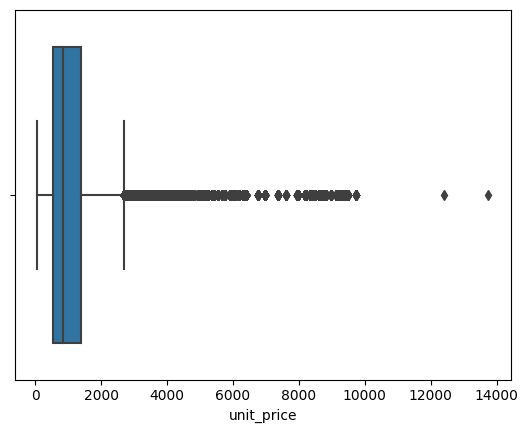

In [157]:
# criar um gráficos com os dias da semena de cada ano e depois estabelecer uma relação para para ver conforme os anos quais dias que a mobly tem maior rendimento
sns.boxplot(x=tabela_limpa['unit_price'])

# **Pré Processamento**


O pré-processamento de dados é uma etapa essencial que envolve a limpeza, transformação e preparação de dados brutos para análise ou uso em modelos de machine learning. Isso inclui tratar erros, valores ausentes e outliers, normalizar dados, codificar variáveis categóricas, reduzir a dimensionalidade e dividir os dados em conjuntos de treinamento e teste. O objetivo é garantir que os dados estejam prontos e confiáveis para análises subsequentes, melhorando a qualidade e a eficácia dos resultados.

A célula de código está substituindo todas as instâncias da string "Sem Registro" na coluna 'price_status' do DataFrame por valores nulos representados por np.nan. Isso ajuda a tratar valores ausentes ou informações incompletas na coluna 'price_status' durante a preparação de dados para o projeto.

In [82]:
tabela_limpa['price_status'] = tabela_limpa['price_status'].replace("Sem Registro", np.nan)

Esse código substitui vírgulas por pontos e converte as colunas 'dolar', 'selic' e 'taxa-desemprego' em um DataFrame chamado `tabela_limpa` para valores numéricos de ponto flutuante, tornando-os adequados para cálculos matemáticos e análises de dados.

In [83]:
tabela_limpa['dolar'] = tabela_limpa['dolar'].str.replace(',', '.').astype(float)
tabela_limpa['selic'] = tabela_limpa['selic'].str.replace(',', '.').astype(float)
tabela_limpa["taxa-desemprego"] = tabela_limpa['taxa-desemprego'].str.replace(',', '.').astype(float)

 Cria-se uma lista de SKUs únicos na coluna 'sku' de uma tabela chamada `tabela_limpa`. Em seguida, ele itera por cada SKU e preenche os valores nulos nas colunas 'price_status' e 'winning_price' com os valores anteriores não nulos correspondentes ao mesmo SKU, usando o método 'forward fill' (preenchimento para frente). Isso é feito para garantir que não haja lacunas nos dados para cada SKU. O DataFrame atualizado é exibido no final do processo.

In [84]:
unique_skus = tabela_limpa['sku'].unique()
# Iterar pelos SKUs e preencher os valores nulos para cada SKU
for sku in unique_skus:
    mask = tabela_limpa['sku'] == sku
    tabela_limpa.loc[mask, 'price_status'] = tabela_limpa.loc[mask, 'price_status'].fillna(method='ffill')
    tabela_limpa.loc[mask, 'winning_price'] = tabela_limpa.loc[mask, 'winning_price'].fillna(method='ffill')
# Exibir o DataFrame atualizado

### **Tratando Exponenciais**

O tratamento de valores exponenciais envolve a eliminação de dados que não possuem relevância significativa no modelo, com o objetivo de evitar problemas na visualização e nos cálculos, que podem ser impactados por informações não relevantes. Para abordar esses valores exponenciais, o grupo optou por aplicar a operação logarítmica em colunas específicas, resultando na redução de valores discrepantes e, consequentemente, aprimorando a representação do modelo.

Aqui, cria-se novas colunas em um DataFrame chamado `tabela_limpa` contendo valores transformados pelo logaritmo natural para a coluna "avg_website_visits_last_week". As novas colunas têm nomes que começam com "log_" seguido pelo nome da coluna original. Essa transformação logarítmica é aplicada para cada valor na coluna original mais 1 (para evitar erros de logaritmo de zero). Isso é útil para realizar transformações em dados numéricos

In [85]:
col_log = [
  "avg_website_visits_last_week",
]

coluna_com_log = []
#Será feito um loop que percorrerá todas as colunas presentes na variável colunas_numéricas
for col in col_log:
  coluna_com_log.append("log_"+col)
  #Criação de uma nova coluna para cada coluna do for, que conterá o nome da coluna original + log, e seu valor será o valor em log da original.
  tabela_limpa['log_'+ col] = np.log(tabela_limpa[col] + 1)

tabela_limpa

,date,weekday_name,sku,unit_price,shipment_type,anchor_category,product_department,product_category,origin_country,sku_color,sku_height,sku_width,sku_length,sku_weight,price_status,winning_price,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,flag_bundle,dolar,selic,taxa-desemprego,log_avg_website_visits_last_week
0,2020-01-01,Wednesday,MO173UP38VJHMOB-414464,1099.99,crossdocking,Sofas,Keva,Sala de Estar,Nacional,cinza,65.0,90.0,145.0,42.15,NaN,NaN,0,17.285714,11,0,SKU vendido em conjunto ou sozinho,NaN,4.50,11.4,2.906120
1,2020-01-01,Wednesday,OL487CL08DELMOB-384528,413.99,crossdocking,Dressers and Nightstands,Móveis,Quarto,Nacional,carvalho,11.0,48.0,90.0,63.85,NaN,NaN,0,48.857143,7,56,SKU vendido em conjunto ou sozinho,NaN,4.50,11.4,3.909162
2,2020-01-01,Wednesday,RU994TA18APHMOB-575967,949.99,crossdocking,Dining Sets,Móveis,Sala de Jantar,Nacional,imbuia,80.0,90.0,130.0,102.40,NaN,NaN,1,22.714286,12,0,SKU vendido em conjunto ou sozinho,NaN,4.50,11.4,3.166078
3,2020-01-01,Wednesday,ES745UP35LGIMOB-669318,2949.99,crossdocking,Sofas,Móveis,Sala de Estar,Nacional,marfim,70.0,88.0,220.0,122.40,NaN,NaN,0,2.800000,13,0,SKU vendido em conjunto ou sozinho,NaN,4.50,11.4,1.335001
4,2020-01-01,Wednesday,OR067MA29HJAMOB-492877,657.99,crossdocking,Mattresses,Móveis,Quarto,Nacional,preto,28.0,88.0,188.0,20.00,Perdendo,529.00,0,0.000000,10,0,SKU vendido em conjunto ou sozinho,NaN,4.50,11.4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814129,2023-07-03,Monday,HR667UP36BSLMOB-988738,1717.95,crossdocking,Sofabeds,Móveis,Sala de Estar,Nacional,cinza,50.0,115.0,200.0,40.00,Único Disponível,1717.95,0,154.142857,10,1,SKU vendido somente sozinho,4.804,13.75,8.3,5.044346
814130,2023-07-03,Monday,DE626CL54BLLMOB-798176,1659.88,crossdocking,Closets,Móveis,Quarto,Nacional,marrom,14.0,56.0,230.0,150.00,Perdendo,1093.68,0,138.000000,15,16,SKU vendido somente sozinho,4.804,13.75,8.3,4.934474
814131,2023-07-03,Monday,IM630CH36ZRVMOB-864724,909.96,crossdocking,Dining Chairs,Móveis,Sala de Jantar,Nacional,bege,48.0,54.0,62.0,18.60,Perdendo,899.96,0,32.714286,10,20,SKU vendido em conjunto ou sozinho,4.804,13.75,8.3,3.517922
814132,2023-07-03,Monday,MO173CH87TWQMOB-519074,619.98,próprio,Bar Stools,Keva,Sala de Jantar,Importado,preto,39.0,48.0,72.0,14.70,Empatando,619.98,0,19.000000,80,136,SKU vendido em conjunto ou sozinho,4.804,13.75,8.3,2.995732


### **Tratamento de missing**

No tratamento de valores ausentes (missing), a decisão foi tomar uma abordagem de remoção dos dados que estavam faltando dentro do dataset. Essa medida foi adotada após cuidadosa consideração das características dos dados e das limitações de outras técnicas de imputação, como preenchimento com a média ou mediana. Foi observado que, no conjunto de dados em questão, as variáveis apresentavam valores muito distintos e não havia uma tendência clara ou padrão que justificasse o preenchimento com medidas resumidas.
Além disso, a escolha de remover os valores ausentes também levou em consideração a natureza dos dados faltantes e seu impacto no problema em questão. Em alguns casos, os dados ausentes podem ser aleatórios e não carregar informações úteis. Em outros casos, a ausência de dados pode ser sistemática e representar uma falta de informação significativa sobre as observações.
Portanto, a remoção dos valores ausentes foi considerada a abordagem mais apropriada para este conjunto de dados específico, levando em conta a preservação da qualidade e integridade dos dados, bem como a relevância das informações disponíveis para a análise e modelagem. É importante destacar que a escolha da estratégia de tratamento de dados ausentes depende do contexto do problema e das características dos dados, e a remoção é uma das opções válidas quando apropriada.


Remove-se todas as linhas do DataFrame `tabela_limpa` que contêm pelo menos um valor ausente (NaN), resultando em um novo DataFrame chamado `tabela_limpa_semNaN`. Isso é útil para trabalhar apenas com dados completos, eliminando linhas que contenham valores faltantes.

In [86]:
tabela_limpa_semNaN = tabela_limpa.dropna(axis = 0)
tabela_limpa_semNaN.info(['semana_do_ano'])

<class 'pandas.core.frame.DataFrame'>
Index: 418773 entries, 385 to 814132
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   date                              418773 non-null  datetime64[ns]
 1   weekday_name                      418773 non-null  object        
 2   sku                               418773 non-null  object        
 3   unit_price                        418773 non-null  float64       
 4   shipment_type                     418773 non-null  object        
 5   anchor_category                   418773 non-null  object        
 6   product_department                418773 non-null  object        
 7   product_category                  418773 non-null  object        
 8   origin_country                    418773 non-null  object        
 9   sku_color                         418773 non-null  object        
 10  sku_height                        4

Essa parte seleciona no DataFrame `tabela_limpa_semNaN` apenas as linhas em que pelo menos uma das duas condições é verdadeira: ou "items_sold" é maior que zero, ou "avg_website_visits_last_week" é maior que zero. Isso mantém no DataFrame apenas os registros que atendem a pelo menos uma dessas condições específicas.

In [87]:
tabela_limpa_semNaN = tabela_limpa_semNaN.loc[(tabela_limpa_semNaN["items_sold"] > 0) | (tabela_limpa_semNaN["avg_website_visits_last_week"] > 0)]

O código calcula a diferença entre os preços vencedores ("winning_price") e os preços unitários ("unit_price") para cada entrada no DataFrame tabela_limpa e armazena essa diferença na nova coluna "diferencia_concorrencia". Essa coluna pode ser usada para analisar e comparar as diferenças de preço entre produtos ou itens.

In [88]:
tabela_limpa_semNaN["diferencia_concorrencia"] = tabela_limpa_semNaN["winning_price"] - tabela_limpa_semNaN["unit_price"]

O código adiciona colunas de tempo ('day', 'month', 'year', 'semana_do_ano') a um DataFrame, depois agrupa os dados por essas colunas e outras informações únicas ('sku'). Realiza várias operações de agregação, como média e mediana, em diferentes colunas e cria um novo DataFrame ('df_agregado') para análises futuras. A forma final do DataFrame é verificada.

In [91]:
#Criando variáveis de tempo para que seja possível realizar a correlação delas no modelo.
tabela_limpa_semNaN["day"] = tabela_limpa_semNaN['date'].map(lambda x: x.day)
tabela_limpa_semNaN["month"] = tabela_limpa_semNaN['date'].map(lambda x: x.month)
tabela_limpa_semNaN["year"] = tabela_limpa_semNaN['date'].map(lambda x: x.year)
tabela_limpa_semNaN['semana_do_ano'] = tabela_limpa_semNaN['date'].dt.isocalendar().week

df_agregado = tabela_limpa_semNaN.drop(['weekday_name', 'day'], axis=1)
df_agregado = df_agregado.groupby(['year', 'month', 'semana_do_ano', 'sku']).agg({
    'unit_price': 'mean',
    'shipment_type': lambda x: x.mode().iloc[0],
    'anchor_category': lambda x: x.mode().iloc[0],
    'product_category': lambda x: x.mode().iloc[0],
    'product_department': lambda x: x.mode().iloc[0],
    'origin_country': lambda x: x.mode().iloc[0],
    'sku_color': lambda x: x.mode().iloc[0],
    'sku_weight': lambda x: x.mode().iloc[0],
    'sku_length': lambda x: x.mode().iloc[0],
    'sku_height': lambda x: x.mode().iloc[0],
    'sku_width': lambda x: x.mode().iloc[0],
    'price_status':lambda x: x.mode().iloc[0],  
    'winning_price': lambda x: x.mode().iloc[0], 
    'stock_qty': 'median', 
    'dolar': 'mean',
    'selic': 'mean', 
    'taxa-desemprego': 'mean',  
    'items_sold': 'sum',
    'log_avg_website_visits_last_week': 'mean',
    'supplier_delivery_time': 'mean',
    'diferencia_concorrencia': 'median',
}).reset_index()
tabela_limpa_semNaN=df_agregado

tabela_limpa_semNaN.shape

(72921, 25)

## Categorização das variáveis
Esta célula faz pré-processamento de dados em um DataFrame chamado `tabela_limpa_semNaN` para prepará-lo para um modelo de machine learning. Primeiro, ele usa o `LabelEncoder` para transformar colunas categóricas em colunas numéricas, tornando-as adequadas para o modelo. Em seguida, ele aplica um mapeamento específico à coluna 'price_status' para substituir categorias por valores numéricos. Outras tentativas de normalização ou padronização dos dados estão comentadas e não estão em uso no momento. Essas transformações são comuns para preparar dados para análises e modelos de machine learning.

In [89]:
# Criar uma instância do LabelEncoder
le = LabelEncoder()

# Está havendo a categorização dos dados que iremos trabalhar no nosso modelo preditivo. Sendo que esses colunas foram escolhidas pelo grupo primeiramente para os primeiros testes para inserção no modelo de Machine Learning e por isso não categorizou as demais colunas

tabela_limpa_semNaN['shipment_type'] = le.fit_transform(tabela_limpa_semNaN['shipment_type'])

tabela_limpa_semNaN['product_department'] = le.fit_transform(tabela_limpa_semNaN['product_department'])

tabela_limpa_semNaN['anchor_category'] = le.fit_transform(tabela_limpa_semNaN['anchor_category'])

tabela_limpa_semNaN['origin_country'] = le.fit_transform(tabela_limpa_semNaN['origin_country'])

tabela_limpa_semNaN['sku_color'] = le.fit_transform(tabela_limpa_semNaN['sku_color'])

tabela_limpa_semNaN['product_category'] = le.fit_transform(tabela_limpa_semNaN['product_category'])

tabela_limpa_semNaN['sku'] = le.fit_transform(tabela_limpa_semNaN['sku'])
# Crie um dicionário de mapeamento de valores
mapeamento = {"Perdendo": -1, "Ganhando": 2, "Único Disponível": 1, "Empatando": 0}
# Use o método map com o dicionário de mapeamento
tabela_limpa_semNaN['price_status'] = tabela_limpa_semNaN['price_status'].map(mapeamento)#tabela_limpa_semNaN['items_sold'] = le.fit_transform(tabela_limpa_semNaN['items_sold'])


### **Retirando Outliers**

Este código identifica e remove outliers (valores extremamente discrepantes) em duas colunas específicas, "items_sold" e "avg_website_visits_last_week", de um DataFrame chamado `tabela_limpa`. Ele faz isso realizando o preenchimento dos dados da semanas da Black Friday (semana 47 e 48) com as medianas de cada SKU. Com essa medida tomada, houve o tratamento desses outliers, pois com a mediana pegamos os resultados bases de todos os resultados. A limpeza de outliers ajuda a melhorar a qualidade dos dados.

In [92]:
# Calcule a mediana dos 'items_sold' e 'avg_website_visits_last_week'
mediana_items_sold = tabela_limpa_semNaN.groupby('sku')['items_sold'].median()
mediana_avg = tabela_limpa_semNaN.groupby('sku')['log_avg_website_visits_last_week'].median()

# Crie uma condição para filtrar com base nas semanas 47 e 48 para items_sold
condicao = (tabela_limpa_semNaN['semana_do_ano'] == 47) | (tabela_limpa_semNaN['semana_do_ano'] == 48)

# Aplique o filtro na coluna 'items_sold' com base na condição
tabela_limpa_semNaN.loc[condicao, 'items_sold'] = tabela_limpa_semNaN.loc[condicao, 'sku'].map(mediana_items_sold)

# # Aplique o filtro na coluna 'items_sold' com base na condição
tabela_limpa_semNaN.loc[condicao, 'log_avg_website_visits_last_week'] = tabela_limpa_semNaN.loc[condicao, 'sku'].map(mediana_avg)

tabela_limpa_semNaN[tabela_limpa_semNaN['semana_do_ano'] == 48]

,year,month,semana_do_ano,sku,unit_price,shipment_type,anchor_category,product_category,product_department,origin_country,sku_color,sku_weight,sku_length,sku_height,sku_width,price_status,winning_price,stock_qty,dolar,selic,taxa-desemprego,items_sold,log_avg_website_visits_last_week,supplier_delivery_time,diferencia_concorrencia
9941,2020,11,48,0,929.9900,0,0,11,4,1,2,18.45,85.0,68.0,72.0,2,864.8907,1.0,5.35100,2.00,14.4,2.0,3.757992,8.0,-65.0993
9942,2020,11,48,1,230.9900,1,14,4,4,1,6,2.00,75.0,50.0,75.0,-1,189.9000,527.0,5.35100,2.00,14.4,49.0,4.420408,20.0,-41.0900
9943,2020,11,48,2,179.9900,0,26,2,4,1,29,12.80,65.0,13.0,36.0,2,167.3907,474.0,5.32700,2.00,14.4,33.0,4.882152,5.0,-12.5993
9944,2020,11,48,3,241.9900,0,22,11,4,1,6,32.00,186.0,9.0,40.0,-1,224.9100,76.0,5.35100,2.00,14.4,21.0,4.289524,5.0,-17.0800
9945,2020,11,48,4,457.9900,0,19,2,4,1,6,35.40,147.0,9.0,73.0,-1,364.9000,0.0,5.35100,2.00,14.4,4.0,3.701053,4.0,-93.0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50786,2022,12,48,740,789.8925,0,0,11,4,1,12,14.00,80.0,67.0,76.0,-1,599.9900,84.0,5.21775,13.75,7.9,13.5,4.549810,10.0,-199.8700
50787,2022,12,48,742,702.6425,0,0,11,4,1,12,12.00,110.0,10.0,22.0,-1,594.9400,0.0,5.21775,13.75,7.9,3.0,2.927878,10.0,-114.9200
50788,2022,12,48,743,639.8925,0,0,11,4,1,27,14.00,84.0,60.0,74.0,-1,506.7700,105.5,5.21775,13.75,7.9,29.0,5.471767,10.0,-133.0900
50789,2022,12,48,744,763.6425,0,0,11,4,1,27,14.00,87.0,60.0,74.0,-1,658.2200,269.5,5.21775,13.75,7.9,41.0,6.110692,10.0,-111.6400


### **HeatMap**
Criação de um heatmap, para conseguir encontrar as relações entre cada possíveis features de nosso modelo. Além disso, o heatmap permite uma melhor visualização do relacionamento entre os dados presentes no data frame, o que melhora o entendimento sobre o banco de dados. 

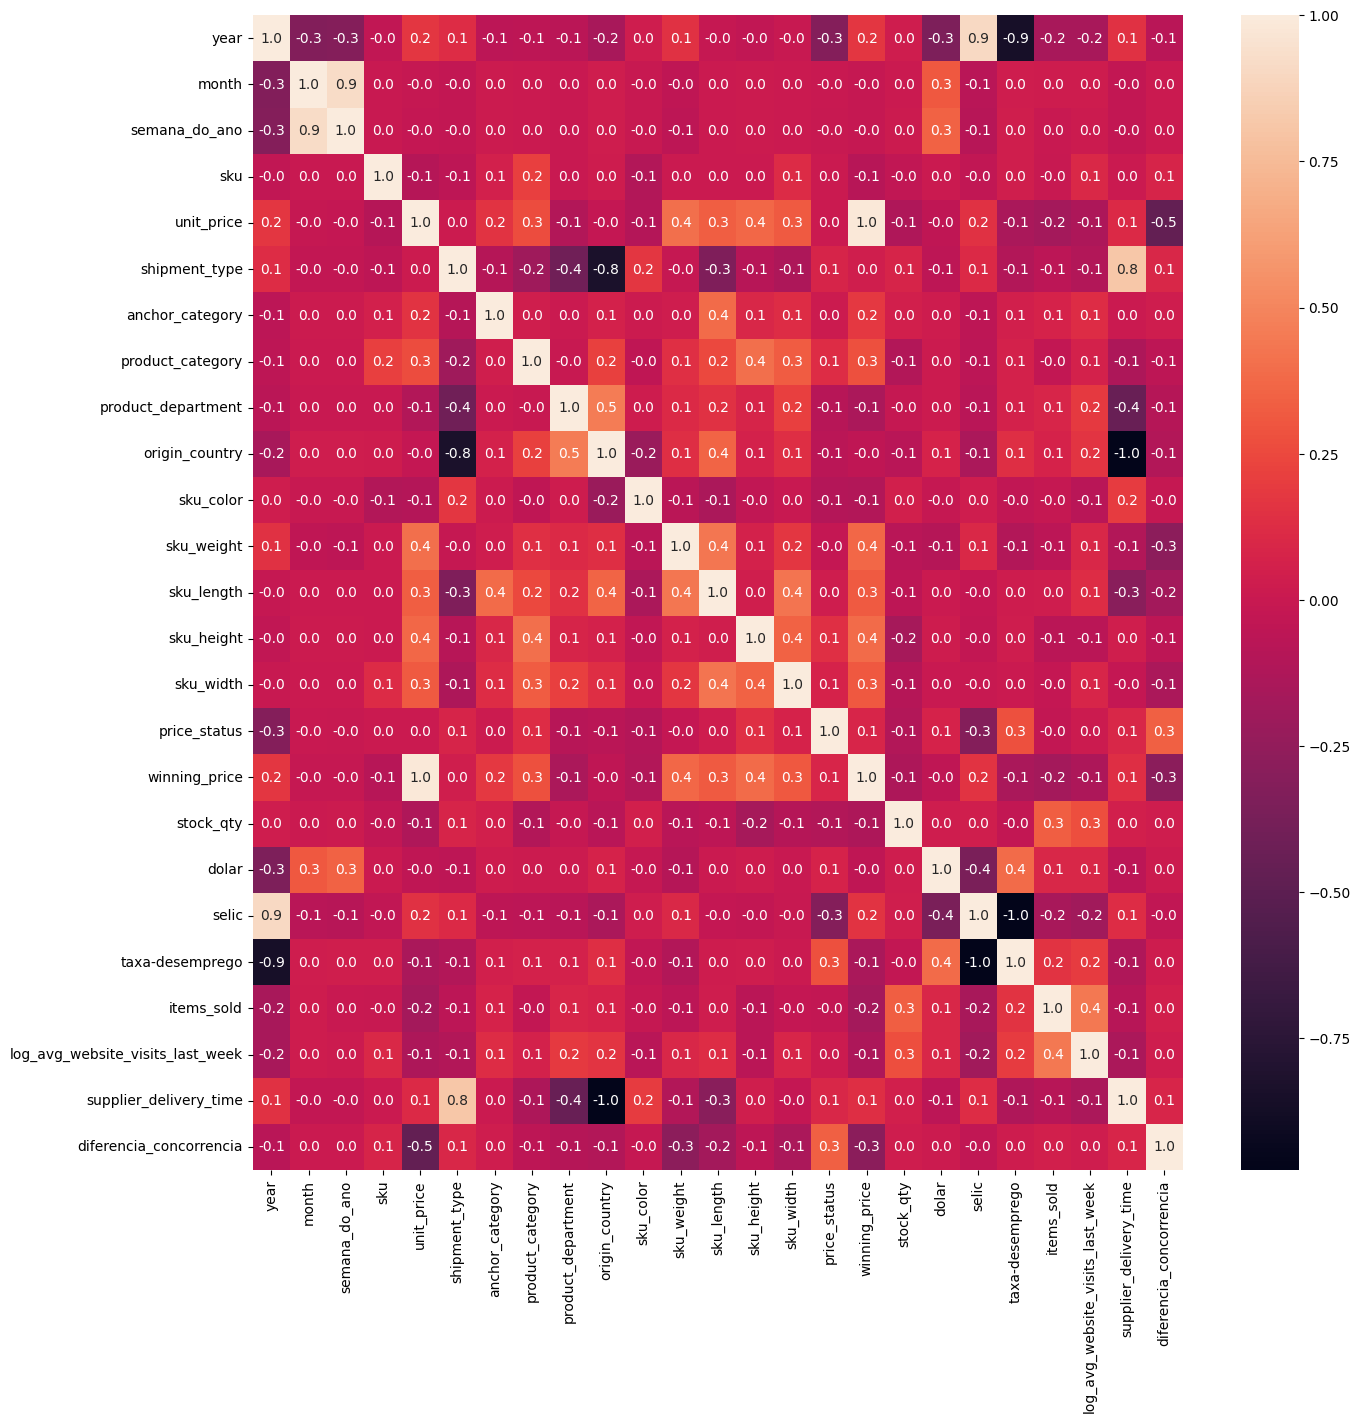

In [168]:
# Criação de tabela de correlação
correlacao = tabela_limpa_semNaN.corr()

# Ajustando o tamanho da figura
plt.figure(figsize=(15, 15))  

# Criando o heatmap
heatmap = sns.heatmap(correlacao, annot=True, fmt=".1f")

# Mostrando o heatmap
plt.show()


# **Hipótese**

### **Hipótese 1: A Integração da Cor deve ser considerada como um parâmetro de Input para a IA** <br>

Com base na análise das tendências de vendas e no feedback recebido [Encontro de validação da 2ª Sprint], podemos formular a seguinte hipótese: a cor dos produtos não deve ser considerada como um resultado final da IA, mas sim um fator de input que influencia as recomendações de compras para o estoque da Mobly. A hipótese sugere que ao integrar a cor como um dos parâmetros de entrada para o sistema de IA, a máquina será capaz de considerar a preferência do cliente por cores específicas ao determinar quais itens devem ser adquiridos para o estoque.

Dentro dessa hipótese, espera-se que a IA leve em conta a cor dos produtos como um dos vários fatores, juntamente com histórico de vendas, sazonalidade, períodos do mês e outros dados relevantes, para gerar recomendações mais precisas e alinhadas com as preferências dos clientes. Isso permitiria que a Mobly mantivesse um estoque otimizado, oferecendo os produtos mais procurados nas cores preferidas pelos consumidores em momentos estratégicos.

### **Hipótese 2: Os meses de Novembro a Janeiro representam períodos de exceções sazonais** <br>
Ao analisar as tendências de receita ao longo dos meses, constata-se que os períodos do mês têm uma influência considerável nas variações de vendas, corroborando com as informações fornecidas pelos representantes da Mobly. Durante um mês típico, a receita oscila notavelmente, variando entre 2 a 3 milhões de reais. No entanto, deve-se salientar que a abordagem estratégica centrada nos períodos do mês não é aplicável ao período que se estende do início de novembro ao meio de janeiro, uma vez que esses meses são caracterizados como outliers.

A observação das flutuações de receita destaca a relevância de adaptar uma estratégia que leva em consideração as diferentes fases do mês. Contudo, os meses entre novembro e janeiro surgem como exceções, apresentando comportamentos distintos que escapam ao que é observado em outros meses. Os dados revelam uma tendência que difere significativamente em relação ao padrão geral dos períodos do mês. Portanto, a hipótese afirma que, embora uma estratégia baseada em períodos mensais seja valiosa, é crucial reconhecer que os meses atípicos, de novembro a janeiro, exigem uma abordagem diferenciada devido à influência de fatores sazonais ou eventos específicos.



### **Hipótese 3: Em média, a cada 30 itens visualizados no site, 1 é vendido** <br>
Com base na análise do gráfico que compara a relação entre o número de itens vendidos e a média semanal de visitas ao site, surge a seguinte hipótese: em média, a cada 30 itens visualizados no site da Mobly, ocorre a venda de aproximadamente 1 item.

A interpretação do gráfico evidencia uma conexão entre a quantidade de itens vendidos e a atividade de visualização por parte dos visitantes do site. Uma proporção notável se destaca, indicando que, em termos médios, a cada conjunto de 30 itens que são visualizados, aproximadamente 1 deles é efetivamente vendido.

A compreensão dessa relação entre visualizações e vendas é de grande utilidade para aprimorar o modelo de previsão de estoque da Mobly. Essa informação proporciona um indicador mais robusto e detalhado do comportamento do cliente, permitindo que a IA leve em consideração não apenas as vendas passadas, mas também a atividade de visualização que antecede essas vendas.





# **Métricas**

Ao desenvolver um modelo preditivo, é essencial avaliar o nível de precisão que eles conseguem alcançar. Para isso, utilizamos métricas de avaliação que nos fornecem insights sobre o desempenho do modelo: Erro Quadrado Médio (MSE), Erro Médio Absoluto (MAE) e Raiz do Erro Quadrado Médio (RMSE).

*Erro Quadrado Médio (MSE):*
O Erro Quadrado Médio (MSE) é uma métrica que calcula a média dos quadrados das diferenças entre as previsões do modelo e os valores reais. Ele penaliza mais fortemente erros maiores, amplificando as discrepâncias significativas. Um valor de MSE mais próximo de zero indica que o modelo tem um desempenho melhor, com menor dispersão entre as previsões e os valores reais.

*Erro Médio Absoluto (MAE):*
O Erro Médio Absoluto (MAE) é a média das diferenças absolutas entre as previsões do modelo e os valores reais. Ele considera diretamente o valor absoluto dos erros, ignorando a direção das discrepâncias. O MAE é uma medida mais intuitiva, pois representa a média dos erros de previsão em unidades originais, o que facilita a interpretação.

*Raiz do Erro Quadrado Médio (RMSE):*
A Raiz do Erro Quadrado Médio (RMSE) é a raiz quadrada do MSE e tem a mesma unidade dos valores previstos. Essa métrica combina as características do MSE, fornecendo uma medida que penaliza erros grandes de maneira mais significativa, porém ainda é expressa na mesma escala dos dados originais. O RMSE é especialmente útil para entender a dispersão das previsões em relação aos valores reais.

In [169]:
colunas_para_drop = ['items_sold']
tabela_para_features = tabela_limpa_semNaN.drop(columns=colunas_para_drop)
selected_columns = tabela_para_features.columns
tabela_modelo = tabela_limpa_semNaN[selected_columns]
print(selected_columns)
# Separar atributos (x) e alvo (y)
x = tabela_modelo
y = tabela_limpa_semNaN['items_sold']

#Definindo a função de métricas escolhidas para o grupo.
def calcular_metricas(y_test,y_pred):
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print("Mean Squared Error:", mse)
  print("Erro Médio Absoluto:", mae)
  print("Root Mean Squared Error:", rmse)
  print("R2: ", r2)

Index(['year', 'month', 'semana_do_ano', 'sku', 'unit_price', 'shipment_type',
       'anchor_category', 'product_category', 'product_department',
       'origin_country', 'sku_color', 'sku_weight', 'sku_length', 'sku_height',
       'sku_width', 'price_status', 'winning_price', 'stock_qty', 'dolar',
       'selic', 'taxa-desemprego', 'log_avg_website_visits_last_week',
       'supplier_delivery_time', 'diferencia_concorrencia'],
      dtype='object')


# **Escolha de Features**

### **Recursive Feature Elimination (RFE)**

A escolha de features, ou características, desempenha um papel fundamental em muitos campos da ciência de dados e da aprendizagem de máquina. Em essência, as features são as variáveis ou atributos que representam os dados que usamos para treinar modelos e fazer previsões. A seleção criteriosa das features é crucial, pois afeta diretamente a qualidade e o desempenho dos modelos que desenvolvemos.

O método Recursive Feature Elimination (RFE) é uma técnica importante e amplamente utilizada no campo da aprendizagem de máquina para selecionar as melhores features ou características de um conjunto de dados. O objetivo principal do RFE é identificar um subconjunto relevante e informativo de features que resultará em um desempenho otimizado do modelo.

In [118]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Criação de um modelo de Random Forest para encontrar os melhores parâmetros
rf_regressor = RandomForestRegressor(bootstrap= False, max_depth= 19, max_features='sqrt', min_samples_leaf= 4, min_samples_split= 11, n_estimators= 179)

# Criar um RFE para estimar os parâmetros
rfe = RFE(estimator=rf_regressor)  

# Adaptando o modelo aos parâmteros que estamos procurando
rfe.fit(x, y) 

# Armazena as features selecionados pelo rfe
selected_features = x.columns[rfe.support_]

# Mostra as features selecionadas pelo modelo
print("Selected Features:", selected_features)

Selected Features: Index(['sku', 'unit_price', 'sku_height', 'sku_width', 'sku_length',
       'sku_weight', 'winning_price', 'stock_qty', 'selic', 'taxa-desemprego',
       'log_avg_website_visits_last_week', 'diferencia_concorrencia',
       'semana_do_ano'],
      dtype='object')


Este código divide um conjunto de dados em recursos (features) e rótulos (labels) e, em seguida, separa esses dados em conjuntos de treinamento e teste. Os recursos incluem informações como preço, dimensões e visitas ao site. A divisão é feita de forma que 25% dos dados sejam reservados para teste, enquanto 75% são usados para treinamento. Isso permite treinar o modelo em dados conhecidos e avaliá-lo em dados desconhecidos para verificar sua capacidade de fazer previsões.

In [94]:
features = ['sku', 'unit_price', 'sku_height', 'sku_width', 'sku_length',
       'sku_weight', 'winning_price', 'stock_qty', 
       'log_avg_website_visits_last_week', 'diferencia_concorrencia',
       'semana_do_ano','selic', 'taxa-desemprego',]
x = tabela_limpa_semNaN[features]
y = tabela_limpa_semNaN['items_sold']
# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### **Resultados**

Os resultados indicam as features selecionadas pelo RFE que são consideradas as mais importantes para o modelo de regressão Random Forest. No caso, as features selecionadas são: 'sku', 'year', 'unit_price', 'avg_website_visits_last_week', 'stock_qty', 'anchor_category' e 'semana_do_ano'. Isso significa que essas sete características são as mais relevantes para prever a variável 'y' com base nos parâmetros especificados no modelo Random Forest.

Essa abordagem é extremamente útil para simplificar modelos, reduzir a dimensionalidade dos dados e, ao mesmo tempo, manter ou até mesmo melhorar o desempenho do modelo, economizando tempo de processamento e recursos computacionais. A seleção de features é uma etapa crítica no processo de construção de modelos de aprendizado de máquina, e o RFE é uma ferramenta valiosa para auxiliar nesse processo, identificando as features que realmente importam para a tarefa em questão.

# **Algoritmos de otimização:**

Após a escolha de modelos realizada pelo grupo foi necessário a criação de algortimos para encontrar os melhores hiperparâmetros para cade modelo. Para todos os métodos de machine Learning selecionados, Ridge, Polynomial Regression, Random Forest e GradientBoost, foram utilizados algoritmos de otmização de hiperparâmetros.

Os hiperparâmetros são parâmetros fornecidos aos modelos utilizados, os quais são especificados antes do treinamentodo modelo. Sendo assim, eles vão auxiliar como o modelo será construído, permitindo modificar como o modelo funciona e os resultados da métricas. Por isso, é interessante o uso de algoritmos de otimização, pois ele fazem a busca por hiperparâmetros, os quais façam o modelo se encaixar de forma mais preciso ao nosso problema.

## RandomSearch para RandomForest

Criação de um algoritmo, para que o mesmo possa compreender, quais hiperparâmetros melhor se encaixam com nosso problema, utilizando o modelo de Machine Learning Random Forest.

In [41]:

# Defina o espaço de hiperparâmetros que deseja pesquisar
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 25),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(3, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Crie uma instância do modelo Random Forest para regressão
rf = RandomForestRegressor()

# Crie um objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')

# Realize a pesquisa aleatória nos hiperparâmetros
random_search.fit(x_train, y_train)

# Imprima os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
print(random_search.best_params_)

# Imprima a melhor pontuação (MSE) no conjunto de validação cruzada
print("Melhor MSE no conjunto de validação cruzada:", -random_search.best_score_)

# Obtenha o melhor modelo treinado
best_rf_model = random_search.best_estimator_

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


245 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

Melhores hiperparâmetros:
{'bootstrap': False, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}
Melhor MSE no conjunto de validação cruzada: 120.12528100689926


## RandomSearch para o modelo Ridge

Criação do modelo de RandomSearch para o modelo Ridge, assim buscando os melhores hiperparâmetros para esse modelo. 

In [ ]:
# Defina a grade de hiperparâmetros que deseja pesquisar
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Valores possíveis para o parâmetro de regularização (alpha)
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Escolha um modelo de regressão linear, como Ridge ou Lasso
ridge = Ridge()  # Para Ridge Regression

# Crie um objeto RandomSearch
random_search_Ridge = RandomizedSearchCV(
    ridge, param_distributions=param_grid, cv=5, n_jobs=-1)

# Realize a pesquisa em grade nos hiperparâmetros
random_search_Ridge.fit(x_train, y_train)

# Imprima os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
print(random_search_Ridge.best_params_)

# Imprima a melhor pontuação (geralmente o R² no caso de regressão)
print("Melhor pontuação de validação cruzada:", random_search_Ridge.best_score_)

# Obtenha o melhor modelo treinado
best_linear_model = random_search_Ridge.best_estimator_

Melhores hiperparâmetros:
{'solver': 'sparse_cg', 'alpha': 0.01}
Melhor pontuação de validação cruzada: 0.2813879193475713


## RandomSearch para PolynomialRegression

Adição do RandomSearch para o modelo PolynomialRegression, para que se tenha o melhor desempenho através dos hiperparâmetros.

In [57]:
# Defina a grade de hiperparâmetros que deseja pesquisar
param_grid = {
    'degree': [2, 3, 4, 5, 6, 7, 8],  # Graus polinomiais a serem considerados
    'interaction_only': [True, False],  # Se considerar apenas interações
}

# Crie um objeto Pipeline com a expansão polinomial e o modelo de regressão linear


# Crie um objeto RandomSearchCV
random_search_poly = RandomizedSearchCV(PolynomialFeatures(), param_distributions=param_grid, cv=5, n_jobs=-1,scoring='r2')

# Realize a pesquisa utilizando o randomsearch nos hiperparâmetros
random_search_poly.fit(x_train, y_train)

# Imprima os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
print(random_search_poly.best_params_)

# Imprima a melhor pontuação (geralmente o R² no caso de regressão)
print("Melhor pontuação de validação cruzada:", random_search_Poly.best_score_)


Melhores hiperparâmetros:
{'interaction_only': True, 'degree': 6}
Melhor pontuação de validação cruzada: nan


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:976: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]



## Random Search para Gradient Boost

Criação do modelo de RandomSearch para o modelo Gradient Boost, assim buscando os melhores hiperparâmetros para esse modelo. 

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Defina os hiperparâmetros que deseja otimizar
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# Crie o modelo Gradient Boosting
gbm = GradientBoostingRegressor()

# Realize a pesquisa aleatória
random_search = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

# Ajuste o modelo aos dados
random_search.fit(x, y)

# Visualize os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros Encontrados:")
print(random_search.best_params_)

# Obtenha o melhor modelo
melhor_modelo = random_search.best_estimator_

# Treine o melhor modelo com seus dados
melhor_modelo.fit(x, y)

# Faça previsões com o melhor modelo
previsoes = melhor_modelo.predict(x)


Melhores Hiperparâmetros Encontrados:
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 142}


# Modelos para teste

Nesse trecho do notebook são executados os modelos, com os melhores hiperparâmetros selecionados anteriormente no algortimo de otimização acima. Sendo assim, esses são os modelos finais e assim tomaremos a decisão final do modelo. 

### **Random Forest**

In [171]:
# Criar e treinar o modelo RandomForestRegressor
regr = RandomForestRegressor(bootstrap= False, max_depth= 24,max_features='sqrt', min_samples_leaf= 5, min_samples_split= 2, n_estimators= 150)
regr.fit(x_train, y_train)

# Fazer previsões no conjunto de testes
y_random_pred = regr.predict(x_test)
calcular_metricas(y_test, y_random_pred)

Mean Squared Error: 298.6396467880634
Erro Médio Absoluto: 7.38692669575194
Root Mean Squared Error: 17.281193442238397
R2:  0.6948059489673337


### **Ridge**

In [121]:
# Criar uma instância do modelo de regressão linear e treinando com a base de treino.
model = Ridge(alpha= 0.01,solver='sparse_cg').fit(x_train, y_train)

# Criando uma variável com as predições da base de teste
y_pred = model.predict(x_test)

#Chamando a função para calcular as métricas.
calcular_metricas(y_test,y_pred)

Mean Squared Error: 715.5992575850958
Erro Médio Absoluto: 13.88968874846077
Root Mean Squared Error: 26.750687048842238
R2:  0.26869510231722804


### **Polynomial regression**

In [122]:
# Definindo o grau da função polinomial que teremos.
# Utilizando 3, pois foi o resultado mais eficiente segundo o algoritmo de otimização.
degree = 3 

#Criando um objeto do modelo ponimoial 
poly = PolynomialFeatures(degree=degree)


# Criando os objetos de treino e testes do modelo.
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Criando o modelo de regressão linear para utilizar o objeto de x_train_poly
regression_model = LinearRegression()
regression_model.fit(x_train_poly, y_train)

# Realizando a predição.
y_pred = regression_model.predict(x_test_poly)

# Calculando o coeficiente 
coefficients = regression_model.coef_

#Chamando a função para calcular as métricas.
calcular_metricas(y_test, y_pred)

Mean Squared Error: 498.5984355405465
Erro Médio Absoluto: 11.48875944246101
Root Mean Squared Error: 22.32931784763132
R2:  0.49045855760350654


### **Gradient Boost**

In [97]:
# Certifique-se de importar todos os módulos necessários
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
        
# Crie o modelo Gradient Boosting de regressão
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=12, random_state=0)
gb_regressor.fit(x_train, y_train)
        
# Faça previsões usando o modelo
y_pred = gb_regressor.predict(x_test)
        
calcular_metricas(y_test, y_pred)

Mean Squared Error: 283.7543054735171
Erro Médio Absoluto: 6.785278207488016
Root Mean Squared Error: 16.8450083251246
R2:  0.7100179868385621


### **SHAP**

O SHAP (SHapley Additive exPlanations) é uma biblioteca que explica o comportamento de modelos de aprendizado de máquina. Ele calcula os valores SHAP para cada característica em um conjunto de dados, medindo quanto cada característica contribui para a previsão do modelo em um ponto de dados específico. Essas contribuições são então somadas para explicar a previsão geral do modelo. O SHAP ajuda a entender a importância relativa de cada característica e como elas influenciam as previsões do modelo, tornando a interpretação de modelos complexos mais acessível.

Este código utiliza essa biblioteca para explicar como as características de um modelo de regressão chamado 'gb_regressor' influenciam suas previsões em um conjunto de dados de teste 'x_test'. Ele calcula os valores SHAP, que medem a importância de cada característica nas previsões do modelo, e cria um gráfico de resumo para visualizar essas influências de forma concisa. Isso ajuda a entender quais características são mais relevantes para o modelo e como elas afetam as previsões.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


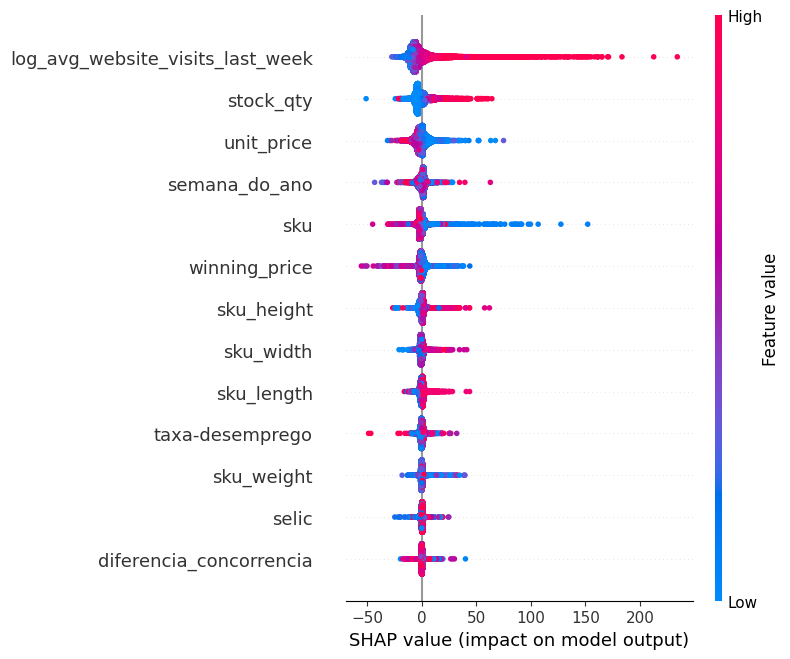

In [37]:
# Fits the explainer
explainer = shap.Explainer(gb_regressor)
# Calculates the SHAP values - It takes some time
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

# **Exportando o Modelo Escolhido**

Nesse campo de código está sendo exportado o modelo escolhido para a codificação do input e do output


In [45]:
dump(gb_regressor, '../notebooks/classes/modelo/modelo_previsao.joblib')

['../notebooks/classes/modelo/modelo_previsao.joblib']

# **Documentação dos Resultados**

Nesta seção, apresentamos os melhores hiperparâmetros e as pontuações de validação cruzada para três algoritmos diferentes utilizados em nosso projeto: Random Forest, Ridge Regression, Polynomial Regression e Gradient Boost.

## **RandomForest**

### **Melhores Hiperparâmetros:**
- `bootstrap`: False
- `max_depth`: 24
- `max_features`: 'sqrt'
- `min_samples_leaf`: 5
- `min_samples_split`: 2
- `n_estimators`: 150

### **Melhor Pontuação de Validação Cruzada:**
120.12528100689926

Usando scoring MSE temos o seguinte resultado para Validação Cruzada 120.12528100689926

## **Ridge Regression**

### **Melhores Hiperparâmetros:**
- `alpha`: 0.01
- `solver`: 'sparse_cg'

### **Melhor Pontuação de Validação Cruzada:**
0.2813879193475713

O modelo de regressão Ridge foi ajustado com um valor de alpha igual a 0.01 e utilizando o solver 'sparse_cg', resultando em uma pontuação de validação cruzada de cerca de 0.2813879193475713

## **Pipeline com Transformação Polinomial**

### **Melhores Hiperparâmetros:**
- `interaction_only`: True
- `degree`: 6

### **Melhor Pontuação de Validação Cruzada:**
nan

Uma avaliação "NaN" (que representa "Not a Number") na validação cruzada durante o processo de busca aleatória (Random Search) para um modelo de regressão polinomial geralmente indica um problema durante o treinamento ou avaliação do modelo. Isso ocorre quando alguma operação matemática resulta em um valor indefinido ou não numérico.

## **Gradient Boost**

### **Melhores Hiperparâmetros:**
- `learning_rate`: 0.1
- `max_depth`: 6
- `min_samples_leaf`: 9
- `min_samples_split`: 5
- `n_estimators`: 142

### **Melhor Pontuação de Validação Cruzada:**
Para este modelo não calculamos a validação cruzada

# **Modelo e Discussão:**
o RMSE foi escolhido como métrica principal, pois permite uma avaliação clara e quantificável da capacidade do modelo de minimizar erros nas previsões, proporcionando "insights" valiosos para aprimorar a eficácia das estratégias de gerenciamento de estoque e tomada de decisões. Embora o Erro Médio Absoluto (MAE) e o Mean Squared Error (MSE) também sejam métricas úteis, o RMSE é preferível devido à sua capacidade de representar tanto a magnitude dos erros quanto a dispersão em uma única medida, tornando-o mais sensível a erros maiores e, portanto, mais apropriado para a avaliação do modelo no contexto específico de previsão de vendas.

Nesse contexto, ao realizamos a mudança de agrupar os dados por semana, houve uma mudança quando aos modelo escolhido. De modo que, a métrica selecionada como referência, o Root Mean Squared Error (RMSE), optou-se por uma medida que oferece uma análise minuciosa das discrepâncias entre as previsões do modelo e os valores reais, favorecendo a precisão das estimativas. No âmbito desse projeto, onde várias abordagens foram comparadas, o Gradient Boost se destacou devido à sua abordagem peculiar. Trata-se de uma técnica de aprendizado em conjunto que constrói uma sequência de árvores de decisão de forma progressiva. A cada iteração, a árvore seguinte trabalha para corrigir as imprecisões das árvores anteriores, refinando o modelo de maneira iterativa para uma melhor adaptação aos dados de treinamento.

A escolha do Gradient Boost baseou-se na sua capacidade de lidar eficazmente com erros, corrigindo constantemente as previsões em áreas onde os modelos anteriores falharam. Além disso, demonstrou uma robustez maior contra o overfitting quando comparado a modelos individuais de árvores de decisão. A capacidade de capturar relações não lineares e interações complexas entre variáveis foi crucial em conjuntos de dados com características intricadas. Através da análise do RMSE, ficou evidente que o Gradient Boost se destacou ao fornecer previsões mais precisas em comparação com os outros modelos avaliados. Ao eleger o Gradient Boost como modelo de escolha com base no RMSE, estão alinhando a seleção com a métrica de avaliação preferencial, priorizando a precisão e minimização de erros nas previsões, elementos cruciais para o êxito da aplicação neste contexto específico.

Ao eleger o Gradient Boost como modelo de escolha com base no RMSE, estão alinhando a seleção com a métrica de avaliação preferencial, priorizando a precisão e minimização de erros nas previsões, elementos cruciais para o êxito da aplicação neste contexto específico, atendendo assim às necessidades e expectativas dos parceiros e stakeholders da Mobly.

Tendo em vista o modelo apresentado e as métricas já citadas, a seguir, é feita uma análise com as métricas aplicadas ao modelo:

**I. Mean Squared Error(MSE):** No nosso caso, o MSE calculado foi 283.7543054735171. Esse valor representa a média dos erros ao quadrado, indicando a dispersão desses erros em relação à quantidade de itens vendidos. Quanto menor o MSE, mais preciso é o modelo em relação às previsões.

**II.Mean Absolute Error (MAE):** No nosso projeto, o MAE calculado foi de 6.785278207488016. Esse valor representa a média das discrepâncias absolutas, indicando a magnitude média dos erros nas previsões. É uma métrica direta que não considera a magnitude dos erros ao quadrado, tornando-se menos sensível a outliers.

**III.Root Mean Squared Error (RMSE):** Em nosso modelo, em média, é apresentada uma discrepância de aproximadamente 16.8450083251246 itens a mais ou a menos em suas previsões em relação à quantidade real de vendas. Portanto, quanto mais próximo o RMSE estiver de zero, mais precisas são as previsões do modelo em termos da quantidade de itens vendidos.


# Modelagem, features e explicação

- ***Random Forest :***
    - O Random Forest é um modelo de aprendizado de máquina que pertence à categoria de algoritmos de conjunto. Ele é amplamente utilizado para tarefas de classificação e regressão. O conceito fundamental por trás do Random Forest é a criação de múltiplas árvores de decisão individuais durante o treinamento e, em seguida, combiná-las para fazer previsões mais robustas e precisas. Cada árvore é treinada em uma parte aleatória dos dados, utilizando diferentes subconjuntos de características. No momento da previsão, as decisões de todas as árvores são ponderadas para chegar a uma previsão final. O Random Forest lida bem com dados desbalanceados, lida com sobreajuste e é altamente escalável.
    - O Random Forest é ideal para conjuntos de dados complexos e com muitas características. Ele se aplica bem a uma variedade de cenários, como classificação de imagens, detecção de fraudes, análise de sentimentos e muito mais. A robustez do modelo é particularmente útil quando os dados contêm ruídos ou outliers.

- ***Polynomial Regression:***
    - A Regressão Polinomial é um modelo de aprendizado de máquina que se enquadra na categoria de algoritmos de regressão. Este modelo é amplamente utilizado para realizar previsões em problemas nos quais a relação entre a variável independente e a variável dependente não é linear, mas pode ser aproximada por um polinômio. Em vez de tentar ajustar uma linha reta aos dados, a Regressão Polinomial ajusta um polinômio de grau superior para melhor capturar a complexidade da relação.
    - A Regressão Polinomial é ideal para cenários em que os dados seguem um padrão curvilíneo. É comumente utilizado em problemas como previsão de preços de imóveis com base em características múltiplas, análise de crescimento de plantas com o tempo, entre outros. Este modelo permite flexibilidade na modelagem da relação entre as variáveis, embora possa ser sensível ao overfitting se o grau do polinômio for muito alto.
        
- ***Ridge:***
    - A Regressão Ridge é uma técnica de aprendizado de máquina usada em problemas de regressão. Ela é uma extensão da regressão linear que lida bem com o problema de multicolinearidade, onde as variáveis independentes estão altamente correlacionadas. 
    - A principal característica da Regressão Ridge é a aplicação de uma penalização nos coeficientes durante o treinamento, o que controla o overfitting e ajuda a interpretar os coeficientes de forma diferente da regressão linear padrão. É especialmente útil quando há alta correlação entre as variáveis independentes. O desempenho da Regressão Ridge depende do ajuste adequado de um parâmetro chamado "alpha", que controla a força da penalização nos coeficientes.
    
- ***Gradient Boosting:***
    - O Gradient Boosting é uma técnica de aprendizado de máquina que pertence à família de algoritmos de boosting. Este método constrói um modelo preditivo forte a partir de um conjunto de modelos mais fracos, geralmente árvores de decisão rasas. A ideia principal é melhorar iterativamente o desempenho do modelo, corrigindo os erros dos modelos anteriores.
    - O Gradient Boosting é eficaz em uma ampla gama de problemas, incluindo regressão e classificação. Ele é especialmente útil quando se deseja criar um modelo de alta precisão e é capaz de lidar com dados complexos e não lineares. É amplamente utilizado em competições de ciência de dados e é uma escolha popular para tarefas como previsão de séries temporais, detecção de anomalias e classificação de imagens. No entanto, o treinamento de modelos de Gradient Boosting pode ser computacionalmente intensivo e requer ajuste cuidadoso de hiperparâmetros.
    
Nesse contexto, e como explicado anteriormente, considere os seguintes aspectos para escolha do Gradient Boost

1. **Sensibilidade a Erros:** Uma das notáveis características do Gradient Boost reside em sua capacidade de corrigir erros de previsão. Isto é possível devido ao seu processo iterativo, onde enfatiza as áreas onde os modelos anteriores falharam. Isso significa que o modelo está constantemente aprendendo e se ajustando com base nos erros passados, o que o torna bastante eficaz em melhorar as previsões ao longo do tempo.

2. **Robustez contra Overfitting:** Devido à sua construção sequencial, onde cada árvore de decisão subsequente corrige os erros da anterior, o Gradient Boost tende a ser menos suscetível ao overfitting em comparação com modelos individuais de árvores de decisão. Isso significa que ele tem uma habilidade inerente de generalizar melhor para dados não vistos, tornando-o uma escolha robusta para uma ampla gama de conjuntos de dados.

3. **Capacidade de Lidar com Dados Complexos:** A habilidade do Gradient Boost de capturar relações não lineares e interações complexas entre variáveis é particularmente valiosa em conjuntos de dados com características intricadas. Enquanto modelos mais simples podem falhar em identificar essas relações complexas, o Gradient Boost consegue discernir padrões sutis que podem ser cruciais para fazer previsões precisas.

4. **Performance Geral:** A métrica de avaliação, o RMSE (Root Mean Squared Error), reflete a capacidade do modelo de fazer previsões precisas. Neste caso, o Gradient Boost demonstrou consistentemente uma capacidade superior em fazer previsões mais acuradas em comparação com os outros modelos avaliados. Isso indica que ele é o modelo mais eficaz para este conjunto de dados específico.

Portanto, considerando a natureza da previsão de demanda para a Mobly e a complexidade dos dados envolvidos, o modelo Gradient Boost é uma escolha sólida que pode fornecer resultados precisos e confiáveis para auxiliar na tomada de decisões relacionadas à gestão da demanda da empresa. No entanto, é sempre recomendável realizar experimentos e ajustes específicos para os dados e requisitos do negócio para determinar a eficácia final do modelo escolhido. Ele também não é tão sensível a variáveis categóricas em relação aos outro modelos possíveis para a utilização no problema.

Com base nos dados utilizados, foram selecionadas as seguintes características como features: day, month, year, sku_color, sku_weight, origin_country, unit_price, avg_website_visits_last_week, stock_qty, semana_do_ano, product_category, product_department e anchor_category. Por meio de análises gráficas, foi possível identificar padrões que acrescentam relevância a essas características no modelo.
A análise dos dias revelou que o período entre os dias 09 e 20 de cada mês tende a apresentar um maior volume de compras na Mobly. Portanto, a feature "day" demonstrou ter uma influência significativa no modelo, pois os diferentes dias do mês podem afetar as tendências de compra. Ademais, por sugestão dos analistas do mobly, foi adicionado a feature "semana_do_ano" pois ela permite indentificar a sazonalidade dentro da empresa.
Assim como os dias, o mês também desempenha um papel importante, já que o consumo de produtos varia de acordo com a época do ano. Portanto, a inclusão da feature "month" no modelo se mostra adequada, pois o mês em que uma compra é realizada pode afetar as preferências do cliente.
Outra característica relevante é o ano, que permite estimar a evolução dos preços ao longo do tempo. Observou-se um aumento nas vendas durante os anos de pandemia (2020 e 2022), provavelmente devido ao aumento do trabalho remoto. No entanto, esses anos foram atípicos.
A feature "sku_color" também possui importância, uma vez que as cores influenciam as decisões de compra dos clientes, muitas vezes relacionadas à harmonização com outros móveis.
O peso dos produtos ("sku_weight") impacta o modelo devido à diversidade de tamanhos de residências. As dimensões dos produtos, especialmente o comprimento, podem influenciar a decisão de compra, considerando o espaço disponível.
O país de origem ("origin_country") afeta o preço final do produto, podendo influenciar a decisão do cliente. Portanto, essa característica é relevante, pois produtos importados e nacionais podem ter preços distintos.
A "unit_price" contribui para a descrição do preço de cada item, influenciando a decisão de compra com base no custo. Logo, sua inclusão é fundamental para considerar a estratégia de precificação.
A média de visitas ao site na última semana ("avg_website_visits_last_week") está correlacionada com o modelo, uma vez que mais visitas frequentemente resultam em mais compras. Portanto, essa característica é essencial para a análise.
Além disso, a quantidade em estoque ("stock_qty") influencia se o cliente comprará imediatamente ou aguardará uma redução de preço. Assim, essa característica é relevante para determinar a disponibilidade do produto e pode impactar a decisão de compra.
Por fim, foram adicionadas as features "product_category", "product_department" e "anchor_category" pois, além da dimunição do RSME, é permitido uma melhor identificação do produto.
Em resumo, as características selecionadas possuem fundamentos sólidos com base nas análises realizadas e desempenham papéis cruciais na previsão de padrões de compra na Mobly.


# **Avaliação de Modelos**

Root Mean Squared Error: 16.8450083251246
R2: 0.7100179868385621
Neste projeto, foram avaliados quatro modelos de regressão para prever a demanda de vendas da Mobly: Random Forest, Gradient Boost, Regressão Polinomial e Ridge. Cada modelo foi submetido a um conjunto de métricas de avaliação para determinar sua eficácia na previsão de vendas. Abaixo estão os resultados da avaliação para cada um dos modelos:

#### **Gradient Boost**

O modelo Gradient Boost demonstrou um desempenho sólido na previsão de demanda de vendas para a Mobly, com os seguintes resultados:

- **Mean Squared Error (MSE)**: 283.7543054735171
  - O MSE é uma métrica que calcula a média dos erros ao quadrado. Quanto menor o valor do MSE, mais preciso é o modelo em suas previsões. Neste caso, o valor do MSE indica que as previsões do Gradient Boost têm uma dispersão relativamente baixa em relação à quantidade real de itens vendidos.

- **Erro Médio Absoluto (MAE)**: 6.785278207488016
  - O MAE é a média das discrepâncias absolutas entre as previsões do modelo e os valores reais. Um MAE baixo sugere que o modelo faz previsões com uma magnitude média de erro pequena, o que é vantajoso em aplicações de previsão de vendas.

- **Root Mean Squared Error (RMSE)**: 16.8450083251246
  - O RMSE é uma métrica semelhante ao MSE, mas sua raiz quadrada é tomada para tornar as unidades consistentes com as unidades dos dados originais. Neste caso, o RMSE indica que, em média, o modelo apresenta uma discrepância de aproximadamente 16.8450083251246 itens a mais ou a menos em suas previsões em relação à quantidade real de vendas.

- **R2 (Coeficiente de Determinação)**: 0.7100179868385621
  - O R2, ou coeficiente de determinação, mede o quanto um modelo de regressão consegue explicar a variação nos dados.Ele fornece uma medida de quão bem as previsões do modelo se ajustam aos dados reais. Varia de 0 a 1, onde 1 indica um ajuste perfeito. Nesse caso, um R2 de 0,71 significa que 71% da variação é explicada pelo modelo. 

#### **Random Forest**

O modelo de Regressão Linear foi avaliado com as seguintes métricas:

- **Mean Squared Error**: 298.6396467880634
- **Erro Médio Absoluto**: 7.38692669575194
- **Root Mean Squared Error**: 17.281193442238397
- **R2**:  0.6948059489673337

O modelo Random Forest apresentou um desempenho inferior ao Gradient Boost, com um MAE mais alto, indicando que suas previsões têm uma magnitude média de erro maior. Além disso, o RMSE é maior, indicando uma maior discrepância nas previsões em relação aos valores reais. O R2 também é mais baixo, sugerindo que o modelo de Regressão Linear explica apenas cerca de 69,48% da variabilidade nas vendas.

#### **Ridge**

O modelo de Regressão Linear foi avaliado com as seguintes métricas:

- **Mean Absolute Error (MSE)**: 715.5992575850958
- **Mean Absolute Error (MAE)**: 13.88968874846077
- **Root Mean Squared Error (RMSE)**: 26.750687048842238
- **R2 (Coeficiente de Determinação)**: 0.26869510231722804

O modelo Ridge apresentou um desempenho inferior ao Gradient Boost, com um MAE mais alto, indicando que suas previsões têm uma magnitude média de erro maior. Além disso, o RMSE é maior, indicando uma maior discrepância nas previsões em relação aos valores reais. O R2 também é mais baixo, sugerindo que o modelo de Regressão Linear explica apenas cerca de 26,87% da variabilidade nas vendas.

#### **Regressão Polinomial**

O modelo de Regressão Polinomial foi avaliado com as seguintes métricas:

- **Mean Absolute Error (MSE)**: 498.5984355405465
- **Erro Médio Absoluto (MAE)**: 11.48875944246101
- **Root Mean Squared Error (RMSE)**: 22.32931784763132
- **R2 (Coeficiente de Determinação)**: 0.49045855760350654

O modelo Regressão Polinomial apresentou um desempenho inferior ao Gradient Boost, com um MAE mais alto, indicando que suas previsões têm uma magnitude média de erro maior. Além disso, o RMSE é maior, indicando uma maior discrepância nas previsões em relação aos valores reais. O R2 também é mais baixo, sugerindo que o modelo de Regressão Polinomial explica apenas cerca de 49,04% da variabilidade nas vendas.


### **Conclusão**

Com base na avaliação das métricas, o modelo Gradient Boost é a escolha preferencial para prever a demanda de vendas na Mobly. Ele apresentou um desempenho superior em termos de precisão, com um RMSE e MAE mais baixos em comparação com os outros modelos. Além disso, o Gradient Boost explicou uma porcentagem significativamente maior da variabilidade nas vendas, com um R2 de 0.71. Isso significa que as previsões do modelo são mais precisas e têm um poder explicativo mais forte em relação aos outros modelos considerados.

No entanto, é importante destacar que a escolha do modelo deve ser feita considerando o contexto específico do negócio e os requisitos da empresa. O Gradient Boost é uma excelente opção para previsões de demanda devido à sua capacidade de lidar com dados complexos e robustez a overfitting, mas a validação contínua do modelo e ajustes específicos podem ser necessários para otimizar ainda mais o desempenho.

Portanto, com base nos resultados da avaliação, recomenda-se a implementação do modelo Gradient Boost para prever a demanda de vendas da Mobly, fornecendo previsões precisas e confiáveis que podem apoiar a gestão de estoque e as decisões estratégicas da empresa.